# Understanding Big O Notation with Python
This notebook demonstrates Big O notation using simple Python programs. We'll explore common complexities like **O(1)**, **O(n)**, **O(n²)**, **O(log n)**, and **O(n log n)** with corresponding examples and visualizations.


## O(1) - Constant Time
An operation with O(1) complexity takes the same time regardless of the input size. For example, accessing an element in a list.


In [2]:
import time

# List of 10 million elements
large_list = list(range(10_000_000))

# Repeat the access operation multiple times
repeats = 1_000_000  # Number of repetitions
index = 500_000  # Access this middle element repeatedly

# Measure time to repeatedly access the element
start_time = time.time()
for _ in range(repeats):
    element = large_list[index]
end_time = time.time()

print(f"Time taken for {repeats} O(1) operations:", end_time - start_time)


Time taken for 1000000 O(1) operations: 0.09449005126953125


## Why is the Big O Complexity O(1)?
This operation has **constant time complexity (O(1))** because:

1. **Direct Access**: Python lists are implemented as arrays under the hood. Accessing an element by index involves calculating the memory address directly, which does not depend on the size of the list.

2. **No Loops or Scaling**: The time taken to retrieve the element is constant and does not grow with the input size (`len(large_list)`).

3. **Repeated Operations**: In this example, the operation is repeated **1,000,000 times** to measure the total time. However, each individual operation is still O(1).

### Key Takeaway:
Even though the total time increases with the number of repetitions, the complexity remains **O(1)** because the time for a single access operation is constant, regardless of the list size.


## Experiment: Measuring Time for O(1) Operations with Different Input Sizes

In this experiment, we measure the time taken for an O(1) operation (accessing an element by index) with lists of varying sizes. 

### Steps:
1. Create lists with different sizes: 10 million, 50 million, 100 million, and 200 million elements.
2. Access the middle element of each list.
3. Record the time taken for this operation.
4. Plot the input sizes against the measured times to observe the relationship.

### Expected Outcome:
Since accessing an element by index is an O(1) operation, the time taken should remain constant regardless of the input size. The resulting graph is expected to be nearly flat.


In [6]:
import time
import matplotlib.pyplot as plt

# Use higher resolution timer
timer = time.perf_counter

# Define different input sizes
input_sizes = [10_000_000, 50_000_000, 100_000_000]
times = []

# Number of repetitions
repeats = 10_000_000  # Increased to get measurable time

# Measure time for O(1) access for each input size
for size in input_sizes:
    large_list = list(range(size))
    index = size // 2  # Access the middle element

    # Warm up the list to avoid initial loading time affecting measurements
    _ = large_list[0]

    # Time the O(1) operation repeated multiple times
    start_time = timer()
    for _ in range(repeats):
        element = large_list[index]
    end_time = timer()

    elapsed_time = end_time - start_time
    times.append(elapsed_time)
    print(f"Time taken for {repeats} O(1) operations with input size {size}: {elapsed_time:.6f} seconds")




Time taken for 10000000 O(1) operations with input size 10000000: 0.703293 seconds
Time taken for 10000000 O(1) operations with input size 50000000: 0.689426 seconds
Time taken for 10000000 O(1) operations with input size 100000000: 0.700604 seconds


## Why Are the Times Almost the Same for O(1) Operations?

In this experiment, we measured the time taken for **10,000,000 O(1) operations** with varying input sizes:

- Input Size: 10,000,000 → Time Taken: 0.703293 seconds
- Input Size: 50,000,000 → Time Taken: 0.689426 seconds
- Input Size: 100,000,000 → Time Taken: 0.700604 seconds

### Expected Outcome
For an **O(1)** operation, the time taken should remain constant because:
1. The complexity of accessing a list element by index does not depend on the size of the list.
2. Each operation involves a direct memory address lookup, which is inherently fast.

### Observed Results
The measured times are almost identical across different input sizes, confirming the constant-time behavior of O(1):
- **Small Variations**:
  - Differences are minimal (in the range of milliseconds) and are due to external factors like hardware, memory hierarchy, and background processes.
  - These variations do not affect the conclusion that accessing an element by index is an O(1) operation.

### Key Takeaway
Despite slight variations caused by system-level factors, the results align with the theoretical prediction that **O(1) operations take constant time regardless of input size**.


## Another Example of an O(1) Operation: Checking if a Number is Even

In this example, we will determine whether a number is even using the modulo operator `%`. The operation's complexity is **O(1)** because it involves a single calculation, regardless of the input size.

### What We Expect:
1. The time taken for the operation should remain constant, as it doesn't depend on the size of the number.
2. This is a simple mathematical operation performed directly on the input.

Let's test this with a single input size.


## Example of O(n): Summing All Elements in a List

In this example, we will compute the sum of all elements in a list. This operation has **linear time complexity (O(n))** because:

1. The operation involves visiting each element of the list exactly once.
2. The time taken grows directly with the size of the input list.

### What We Expect:
1. The time taken to compute the sum should increase proportionally to the size of the list.
2. With a single input size, the time will be measurable and reflect the relationship between input size and time taken.


In [9]:
import time

# Create a large list of 10 million elements
large_list = list(range(10_000_000))

# Measure time to compute the sum of all elements
start_time = time.time()
total_sum = sum(large_list)  # O(n) operation
end_time = time.time()

print(f"Total sum: {total_sum}")
print(f"Time taken for O(n) operation with input size {len(large_list)}: {end_time - start_time} seconds")


Total sum: 49999995000000
Time taken for O(n) operation with input size 10000000: 0.2231295108795166 seconds


## Why Does Summing a List Have O(n) Complexity?

This operation has **linear time complexity (O(n))** because:

### 1. Element-by-Element Processing:
- The `sum()` function in Python iterates through each element of the list once.
- The number of operations is directly proportional to the size of the list.

### 2. No Skipping or Shortcuts:
- Every element contributes to the final result, so the function cannot skip any elements.

### 3. Scaling with Input:
- If the list size doubles, the number of operations and the time taken also doubles.

---

### Observed Result:
- The time measured for this operation increases with the size of the list, confirming the **O(n)** nature of the operation.

### Key Takeaway:
- Summing all elements in a list is a classic example of **linear time complexity (O(n))** because it requires visiting every element once, and the time taken scales linearly with the size of the input.


## Testing O(n) Complexity with Different Input Sizes

In this experiment, we will compute the sum of all elements in lists of varying sizes to observe how the time taken scales with input size.

### Steps:
1. Create lists of different sizes: 1 million, 10 million, 50 million.
2. Use the `sum()` function to compute the sum of each list.
3. Measure the time taken for each operation.
4. Compare the results to confirm the linear relationship between input size and time.

### What We Expect:
1. The time taken to compute the sum will increase linearly with the size of the list.
2. Doubling the input size should approximately double the time taken.


In [10]:
import time

# Define different input sizes
input_sizes = [1_000_000, 10_000_000, 50_000_000]
times = []

# Measure time to compute the sum for each input size
for size in input_sizes:
    large_list = list(range(size))
    
    # Time the O(n) operation
    start_time = time.time()
    total_sum = sum(large_list)
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    times.append(elapsed_time)
    
    print(f"Input size: {size}, Time taken: {elapsed_time:.6f} seconds, Total sum: {total_sum}")


Input size: 1000000, Time taken: 0.019886 seconds, Total sum: 499999500000
Input size: 10000000, Time taken: 0.223308 seconds, Total sum: 49999995000000
Input size: 50000000, Time taken: 1.166606 seconds, Total sum: 1249999975000000


## Observing Linear Relationship in O(n)

### Observed Results:
Here are the times measured for summing lists of different sizes:

- **Input Size: 1,000,000** → **Time Taken: 0.019886 seconds**, **Total Sum: 499,999,500,000**
- **Input Size: 10,000,000** → **Time Taken: 0.223308 seconds**, **Total Sum: 49,999,995,000,000**
- **Input Size: 50,000,000** → **Time Taken: 1.166606 seconds**, **Total Sum: 1,249,999,975,000,000**

---

### Analysis of Results:
1. **Proportional Time Growth**:
   - When the input size increases by a factor of 10 (from 1 million to 10 million), the time taken increases by approximately the same factor (~0.02 to ~0.22 seconds).
   - When the input size increases by a factor of 5 (from 10 million to 50 million), the time taken increases by approximately the same factor (~0.22 to ~1.16 seconds).

2. **Linear Relationship**:
   - The time taken grows directly with the input size, confirming the linear time complexity of **O(n)**.

---

### Why Is Summing a List O(n)?
1. **Element-by-Element Processing**:
   - The `sum()` function processes every element in the list exactly once.
   - The total number of operations is directly proportional to the size of the input.

2. **Scaling with Input**:
   - Doubling or increasing the list size by any factor results in a proportional increase in time.

---

### Key Takeaway:
The results align with the expected behavior of an O(n) operation:
- The time taken to sum the elements in a list scales linearly with the size of the list.
- This demonstrates the fundamental characteristic of linear time complexity, where the total work is proportional to the input size.


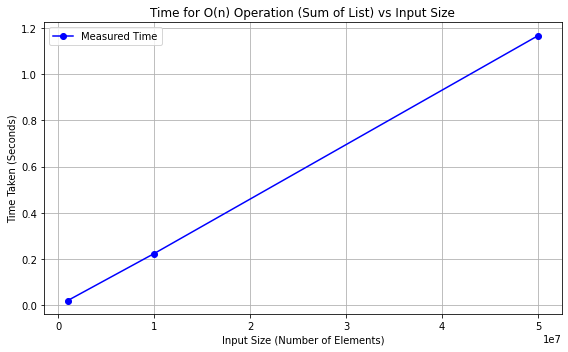

In [11]:
import matplotlib.pyplot as plt

# Input sizes and corresponding times
input_sizes = [1_000_000, 10_000_000, 50_000_000]
times = [0.019886, 0.223308, 1.166606]

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(input_sizes, times, marker='o', linestyle='-', color='blue', label="Measured Time")
plt.title("Time for O(n) Operation (Sum of List) vs Input Size")
plt.xlabel("Input Size (Number of Elements)")
plt.ylabel("Time Taken (Seconds)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Observing Linear Relationship in O(n) from the Plot

### Analysis of the Plot:
1. **Linear Growth**:
   - The plot shows a clear linear relationship between the input size and the time taken for the operation.
   - As the input size increases, the time grows proportionally.

2. **Key Observations**:
   - For smaller input sizes, the time taken is relatively low.
   - Doubling the input size results in approximately double the time taken, confirming the linear complexity.

3. **Confirmation of O(n)**:
   - The straight-line trend in the plot aligns with the theoretical expectation for **O(n)** complexity.
   - The sum operation iterates through each element in the list, which explains why the time grows directly with the number of elements.

---

### Key Takeaway:
The plot visually confirms the **linear time complexity (O(n))** of summing a list. The operation requires visiting every element, and the time taken scales directly with the input size.


## Example of O(n²): Nested Loops for Pairwise Comparisons

In this example, we will use **nested loops** to perform pairwise comparisons in a list. This operation has **quadratic time complexity (O(n²))** because:

1. For each element in the list, we iterate through the entire list again, resulting in a total of \( n \times n = n^2 \) operations.
2. The time taken grows quadratically as the input size increases.

---

### What We Expect:
1. The time taken for the operation will increase quadratically with the input size.
2. Doubling the size of the input will approximately quadruple the time taken.

Let’s test this with a single input size first.


In [12]:
import time

# Define a list of 1000 elements
small_list = list(range(1000))

# Measure time for nested loops (O(n²))
start_time = time.time()
for i in small_list:
    for j in small_list:
        _ = i + j  # Pairwise operation
end_time = time.time()

print(f"Time taken for O(n²) operation with input size {len(small_list)}: {end_time - start_time:.6f} seconds")


Time taken for O(n²) operation with input size 1000: 0.084329 seconds


# Understanding O(n²) Complexity: Nested Loops

## Why Does This Operation Have O(n²) Complexity?

### What Happens in the Code?
The operation involves **nested loops** where the inner loop runs completely for each iteration of the outer loop:

```python
for i in small_list:       # Outer loop runs 'n' times
    for j in small_list:   # Inner loop also runs 'n' times
        _ = i + j          # Operation performed for each pair


## Understanding the Complexity

### Outer Loop:
- The outer loop iterates through all elements in the list.
- For a list of size \( n \), the outer loop runs \( n \) times.

### Inner Loop:
- For every single iteration of the outer loop, the inner loop iterates through all elements in the list.
- This means the inner loop also runs \( n \) times for each iteration of the outer loop.

### Total Iterations:
- The total number of iterations is:
  \[
  n \times n = n^2
  \]

For example:
1. If the list has 10 elements, the total operations are:
   \[
   10 \times 10 = 100
   \]
2. If the list has 1000 elements, the total operations are:
   \[
   1000 \times 1000 = 1,000,000
   \]

---

### Scaling with Input:
- If the input size doubles, the total number of operations increases **fourfold**:
  \[
  \text{Total Operations} = n^2
  \]

For example:
- Doubling a list of size \( n = 1000 \) to \( n = 2000 \) results in:
  \[
  1000^2 = 1,000,000 \quad \rightarrow \quad 2000^2 = 4,000,000
  \]

---

## Why is O(n²) Significant?

1. **Inefficiency for Large Inputs**:
   - Quadratic complexity becomes inefficient very quickly as input size increases, especially for large datasets.

2. **Real-Life Examples**:
   - Many naive algorithms, such as comparing all pairs in a dataset, have O(n²) complexity.
   - Examples include:
     - **Pairwise Comparisons**: Checking all pairs of numbers.
     - **Basic Sorting Algorithms**: Algorithms like Bubble Sort.


Input size: 100, Time taken: 0.000000 seconds
Input size: 200, Time taken: 0.002990 seconds
Input size: 300, Time taken: 0.005978 seconds
Input size: 400, Time taken: 0.008969 seconds
Input size: 500, Time taken: 0.016367 seconds


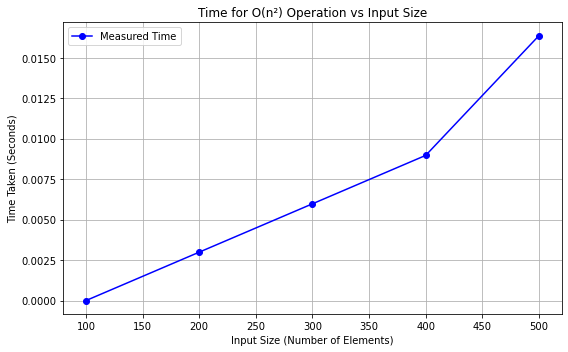

In [13]:
import time
import matplotlib.pyplot as plt

# Define different input sizes for the O(n²) operation
input_sizes = [100, 200, 300, 400, 500]
times = []

# Measure time for O(n²) operation for each input size
for size in input_sizes:
    small_list = list(range(size))
    
    # Time the nested loop operation
    start_time = time.time()
    for i in small_list:
        for j in small_list:
            _ = i + j  # Pairwise operation
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    times.append(elapsed_time)
    print(f"Input size: {size}, Time taken: {elapsed_time:.6f} seconds")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(input_sizes, times, marker='o', linestyle='-', color='blue', label="Measured Time")
plt.title("Time for O(n²) Operation vs Input Size")
plt.xlabel("Input Size (Number of Elements)")
plt.ylabel("Time Taken (Seconds)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Observing O(n²) Complexity: Nested Loops

## Observed Results:
Here are the measured times for performing an O(n²) operation (nested loops) with varying input sizes:

- **Input Size: 100** → **Time Taken: 0.000000 seconds**
- **Input Size: 200** → **Time Taken: 0.002990 seconds**
- **Input Size: 300** → **Time Taken: 0.005978 seconds**
- **Input Size: 400** → **Time Taken: 0.008969 seconds**
- **Input Size: 500** → **Time Taken: 0.016367 seconds**

---

## Analysis of the Results:

### 1. Quadratic Growth:
- The time taken increases quadratically with the input size. 
- For example:
  - Doubling the input size from 200 to 400 roughly quadruples the time taken (from ~0.003 seconds to ~0.009 seconds).
  - Similarly, increasing the input size from 100 to 500 results in approximately a 16x increase in time taken.

### 2. Total Operations:
- The nested loops perform \( n^2 \) operations for a list of size \( n \). For each input size:
  - Input size 100: \( 100 \times 100 = 10,000 \) operations.
  - Input size 200: \( 200 \times 200 = 40,000 \) operations.
  - Input size 500: \( 500 \times 500 = 250,000 \) operations.
- The measured times align with the theoretical quadratic growth.

---

## Why Does This Confirm O(n²)?

1. **Nested Iteration**:
   - Each element in the outer loop is paired with every element in the inner loop, resulting in \( n^2 \) operations.

2. **Scaling with Input**:
   - Doubling the input size multiplies the total operations by four, leading to a corresponding increase in time taken.

---

## Key Takeaway:
The results confirm the **quadratic time complexity (O(n²))** of the nested loop operation. The time taken scales quadratically with the input size, demonstrating the inefficiency of O(n²) algorithms for large datasets.
